## Setup

In [1]:
'''
    Purpose: 
    - Extract training data from full CODE-15% dataset
    - validate data processing functions

'''

'\n    Purpose: \n    - Extract training data from full CODE-15% dataset\n    - validate data processing functions\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

# third party modules
import os
import h5py
import math
import pandas as pd
import numpy as np

# project modules
import datasets as datasets

# define environmental variables to prevent overuse of CPU Cores
# Access and modify environmental variables
os.environ['TF_NUM_INTRAOP_THREADS'] = '1' #set to 1
os.environ['TF_NUM_INTEROP_THREADS'] = '3' #set to 1 less than # of requested cores
print(f"TF_NUM_INTRAOP_THREADS is {os.getenv('TF_NUM_INTRAOP_THREADS')}")
print(f"TF_NUM_INTEROP_THREADS is {os.getenv('TF_NUM_INTEROP_THREADS')}")


import os
import h5py
import math
import pandas as pd
import numpy as np
import time
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Activation, Add, Flatten, Dense)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (ModelCheckpoint, TensorBoard, ReduceLROnPlateau,
                                        CSVLogger, EarlyStopping)
from tensorflow.keras.models import load_model
from sklearn.pipeline import Pipeline

# Project modules
import datasets as datasets

import datetime




2025-04-30 17:08:43.712904: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 17:08:43.716515: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 17:08:43.727813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746047323.746380  317735 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746047323.752030  317735 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-30 17:08:43.772506: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

TF_NUM_INTRAOP_THREADS is 1
TF_NUM_INTEROP_THREADS is 3


## Step 1: Load in and save all the raw training data 

In [37]:
# declare paths

path_to_file = '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part16.hdf5'

# '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part0.hdf5',


hdf5_paths = [
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part0.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part1.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part2.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part3.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part4.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part5.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part6.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part7.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part8.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part9.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part10.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part11.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part12.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part13.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part14.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part15.hdf5',
        '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part16.hdf5']

# exam.csv path
exam_csv_path = '/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams15.csv'


In [38]:


# init arrays
# Initialize lists to hold data chunks
x_list = []
id_list = []

# Process each file
for path in hdf5_paths:
    print(f"Processing {path}")
    with h5py.File(path, 'r') as f:
        traces_ids = np.array(f['exam_id'])      # shape: (N,)
        tracings = f['tracings'][()]             # shape: (N, L, C) or similar
        id_list.append(traces_ids)
        x_list.append(tracings)

# Concatenate everything
x_total = np.concatenate(x_list, axis=0)
id_total = np.concatenate(id_list, axis=0)

print(f"Final shape of x_total: {x_total.shape}")
print(f"Final shape of id_total: {id_total.shape}")




Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part0.hdf5
Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part1.hdf5
Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part2.hdf5
Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part3.hdf5
Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part4.hdf5
Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part5.hdf5
Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part6.hdf5
Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part7.hdf5
Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part8.hdf5
Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams_part9.hdf5
Processing /projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE15/exams

In [25]:
# read in the .csv
gt_csv = pd.read_csv(exam_csv_path)
gt_csv = gt_csv[['exam_id','1dAVb', 'RBBB','LBBB', 'SB', 'AF','ST']]

(345779, 15)
Index(['exam_id', 'age', 'is_male', 'nn_predicted_age', '1dAVb', 'RBBB',
       'LBBB', 'SB', 'ST', 'AF', 'patient_id', 'death', 'timey', 'normal_ecg',
       'trace_file'],
      dtype='object')
(345779, 7)
<bound method NDFrame.head of         exam_id  1dAVb   RBBB   LBBB     SB     AF     ST
0       1169160  False  False  False  False  False  False
1       2873686  False  False  False  False  False  False
2        168405  False  False  False  False   True  False
3        271011  False  False  False  False  False  False
4        384368  False  False  False  False  False  False
...         ...    ...    ...    ...    ...    ...    ...
345774  1123951  False  False  False  False  False  False
345775   954704  False  False  False  False  False  False
345776   589697  False  False  False  False  False  False
345777  2780563  False  False  False  False  False  False
345778  1576698  False  False  False  False  False  False

[345779 rows x 7 columns]>


In [39]:


# rearrange the .csv file rows to match order of hdf5 files
gt_csv['exam_id'] = gt_csv['exam_id'].astype(int)  # Convert to string (or int, depending on your data)
id_total = id_total.astype(int)  # Make sure id_total is also of the same type

# check for ID's in the hdf that are not in .csv
missing_ids = [id for id in id_total if id not in gt_csv['exam_id'].values]
if missing_ids:
    print(f"Missing IDs in CSV: {missing_ids}")
    mask = np.isin(id_total, missing_ids, invert=True)
    id_total_filtered = id_total[mask]
    x_total_filtered = x_total[mask]  # Assuming tracings is a NumPy array and corresponds to id_total


# Check for IDs in `gt_csv['exam_id']` that are not in `id_total`
missing_in_hdf = [id for id in gt_csv['exam_id'].values if id not in id_total]

if missing_in_hdf:
    print(f"Missing IDs in HDF5: {missing_in_hdf}")
    # Remove rows from CSV that don't have corresponding IDs in HDF5
    gt_csv_filtered = gt_csv[~gt_csv['exam_id'].isin(missing_in_hdf)]

    # Optional: check if the filtered CSV now matches the expected number of rows
    print(f"Filtered CSV shape: {gt_csv_filtered.shape}")

# rearrange after all missing rows are out
gt_csv_sorted = gt_csv_filtered.set_index('exam_id').loc[id_total_filtered].reset_index()


Missing IDs in CSV: [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Missing IDs in HDF5: [np.int64(2045398), np.int64(1883443), np.int64(2042685), np.int64(1852656), np.int64(1889021), np.int64(1949887), np.int64(2055648), np.int64(1955171), np.int64(1924734), np.int64(1857787), np.int64(1849180), np.int64(2102151), np.int64(1845099), np.int64(1892154), np.int64(1826682), np.int64(1863509), np.int64(1886154), np.int64(1831730), np.int64(1858274), np.int64(2067151), np.int64(1984421), np.int64(1917169), np.int64(2043959), np.int64(1921350), np.int64(1823817), np.int64(1831854), np.int64(2109279), np.int64(1830731), np.int64(1928007), np.int64(1886076), np.int64(1845711), np.int64(1949510), np.int64(2058169), np.int64(1874586), np.int64(1823913), np.int64(1872428), np.int64(2056767), np.int64(1826785), np.int64(20383

KeyError: '[0] not in index'

In [41]:

# rearrange after all missing rows are out
gt_csv_sorted = gt_csv_filtered.set_index('exam_id').loc[id_total_filtered].reset_index()




In [49]:
# save np.array and GT
# prints for validation
print(gt_csv_sorted.shape)
print(id_total_filtered.shape)
print(x_total_filtered.shape)


print(gt_csv_sorted.head)
print(id_total_filtered[:5])
print(id_total_filtered[-5:])

(340000, 7)
(340000,)
(340000, 4096, 12)
<bound method NDFrame.head of         exam_id  1dAVb   RBBB   LBBB     SB     AF     ST
0        590673  False  False  False  False  False  False
1        214626  False  False  False  False  False  False
2       2936711  False  False  False  False  False  False
3       1175521  False  False  False  False  False  False
4       1073151  False  False  False  False  False  False
...         ...    ...    ...    ...    ...    ...    ...
339995  1862596  False  False  False  False  False  False
339996  1842311  False  False  False  False  False  False
339997  1958077  False   True  False  False  False  False
339998  1868644  False  False  False   True  False  False
339999  1856377  False  False  False  False  False  False

[340000 rows x 7 columns]>
[ 590673  214626 2936711 1175521 1073151]
[1862596 1842311 1958077 1868644 1856377]


In [51]:
# save these dataframes
now = datetime.datetime.now()

# save np dataframe
np.save(f'all_parts_hdf_tracings_{now}.npy',x_total_filtered)

# save np series
np.save(f'all_parts_hdf_ids_{now}.npy',id_total_filtered)

# save pd dataframe to csv
gt_csv_sorted.to_csv(f'all_parts_GT_{now}.csv')

## Step 2: Make inference runner and run inference

In [16]:
# load in full CODE15% data
code15_all_tracings_path = "./all_parts_hdf_tracings.npy"
tracings = np.load(code15_all_tracings_path, allow_pickle=True)  # allow_pickle=True if objects are stored

In [17]:
print(tracings.shape)

(340000, 4096, 12)


In [18]:
# define key funcrtions

# define functions
def ECG_one_d_labels(model_predictions, onehot_labels = True):
    '''
    
    Purpose: turn one-hot encoding (N,6) array into (Nx1) vector of classes

    Input: 
    model_predictions: 2D array of probabilities or one-hot encodings (827x6)
    onehot_labels: boolean variable 

    Output: 
    (Nx1) vector of classes

    Comments: 
    The sample class is the class that exceeds the threshold
    If there are >1 classes that exceed the threshold, a tuple will be used to store the multiple classes 
    '''
    
    if not onehot_labels:
        # establish threshold
        threshold = np.array([0.124, 0.07, 0.05, 0.278, 0.390, 0.174])
        # generate class 0 probability
        exceedances = 1 - (np.maximum((model_predictions - threshold) , 0) / (1 - threshold))
        normal_prob = np.mean(exceedances, axis = 1, keepdims = True) # normal prob should be (N,1)
        # add normal prob
        probability_n = np.column_stack((normal_prob, model_predictions))
        # new threshold
        new_threshold = np.array([1, 0.124, 0.07, 0.05, 0.278, 0.390, 0.174])

        # make mask
        mask = probability_n >= new_threshold
    else:
        print(model_predictions.shape)

        mask = model_predictions == 1

        # Ensure each row has at least one '1'
        # no_positive_class is a column vector
        # Find rows with all False (no '1') # rows with all false becomes true
        no_positive_class = ~mask.any(axis=1) 
        
        # Expand mask by adding a new first column of zeros
        mask = np.column_stack((no_positive_class, mask))
    
    sample_classes = []
    for row in mask:
        passing_indices = np.where(row)[0]
        if len(passing_indices) > 1:  # If more than one indices pass
            if not onehot_labels: 
                # calc exceedances    
                exceedances = row - new_threshold
                # Get class with the highest exceedance
                max_class = np.argmax(exceedances)
                sample_classes.append(max_class)
            else:
                sample_classes.append(tuple(sorted(passing_indices)))  # Ensure passing indices are sorted in ascending order
        elif len(passing_indices) == 0:  # no passes
            sample_classes.append(0) 
        else:
            sample_classes.append(passing_indices[0])  
    return sample_classes


def batch_inference(data, model, batch_size = 500):
    
    results = []
    
    for i in range(0,data.shape[0], batch_size):
        print(f'working on indicies {i} to {i+batch_size}')
        batch = data[i:i+batch_size]
        batch_results = model.predict(batch, verbose = 1)
        results.append(batch_results)
    
    print(len(results))
    
    return np.concatenate(results)

# unit test batch inference
def test_batch_vs_full_inference(data, model, batch_size=500):
    full_results = model.predict(data)
    batched_results = batch_inference(data, model, batch_size=batch_size)
    
    np.testing.assert_allclose(full_results, batched_results, rtol=1e-5)
    print("Test passed: full and batched inference match!")

def output_evaluation(y_pred, y_true):
    # make confusion matrix
    from sklearn.metrics import multilabel_confusion_matrix, classification_report
    from sklearn.preprocessing import MultiLabelBinarizer
    
    # Ensure all items are tuples
    y_true_tuples = [x if isinstance(x, tuple) else (x,) for x in y_true]
    y_pred_tuples = [x if isinstance(x, tuple) else (x,) for x in y_pred]
    
    # Binarize
    mlb = MultiLabelBinarizer()
    y_true_bin = mlb.fit_transform(y_true_tuples)
    y_pred_bin = mlb.transform(y_pred_tuples)
    
    # Confusion matrices for each class
    conf_matrices = multilabel_confusion_matrix(y_true_bin, y_pred_bin)
    
    # Per-class breakdown
    print("Labels:", mlb.classes_)
    for label, matrix in zip(mlb.classes_, conf_matrices):
        print(f"\nClass {label} Confusion Matrix:\n{matrix}")
    
    # Optional: Full classification report
    print("\nClassification Report:")
    print(classification_report(y_true_bin, y_pred_bin, target_names=[f"class {i}" for i in mlb.classes_]))
    

In [29]:
# Select points to explain from training set

num_train_samples = 3000

# load pretrained model 
model_path = "/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/PretrainedModels/model/model.hdf5"
pre_model = load_model(model_path)  
pre_model.compile(loss='binary_crossentropy', optimizer=Adam())

x_subset = tracings[:num_train_samples,:,:]

# run inference with batch inference function
model_predictions = batch_inference(x_subset, pre_model)   # y_score is a numpy array with dimensions 827x6. It holds the predictions generated by the model

# extra
print(model_predictions.shape)
print(model_predictions[:5])

# Generate dataframe
np.save("/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/temp_dnn_output.npy", model_predictions)
print("Output predictions saved")

working on indicies 0 to 500
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
working on indicies 500 to 1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
working on indicies 1000 to 1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
working on indicies 1500 to 2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
working on indicies 2000 to 2500
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
working on indicies 2500 to 3000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
6
(3000, 6)
[[1.5956304e-07 4.3541677e-09 3.1149266e-08 1.3531692e-09 3.2664211e-08
  7.6611100e-09]
 [3.4877272e-07 7.2756321e-09 4.2195034e-09 7.6132585e-09 2.3492127e-07
  8.1990850e-09]
 [3.8565338e-09 1.4485303e-09 3.5030456e-09 4.7024846e-09 4.1608268e-09
  4.4236637e-09]
 [1.6039863e-08 3.2963035e-09 6.1932677e-09 8.5783464e-10 1.0428660e-08
  1.9298301e-09]
 [1.3294857e-05 4.4975121e-08 2.3046706e-08 1.6890686e-08 1.7017165e-06
  2.2906338e-08]]
Output predictions saved


In [30]:
# UNIT TEST: ensure batch and full inference are identical
test_batch_vs_full_inference(x_subset, pre_model)

94/94 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step
working on indicies 0 to 500
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
working on indicies 500 to 1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
working on indicies 1000 to 1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
working on indicies 1500 to 2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
working on indicies 2000 to 2500
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
working on indicies 2500 to 3000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
6
Test passed: full and batched inference match!


In [31]:
# convert probabilities to classes
y_pred = ECG_one_d_labels(model_predictions, onehot_labels = False)
print(len(y_pred))

3000


## Evalue Subset of Training Set Performance

In [42]:
gt_csv_sorted = pd.read_csv("./all_parts_GT.csv")
print(gt_csv_sorted.columns)
gt_csv_sorted = gt_csv_sorted.iloc[:,2:]
y_true = ECG_one_d_labels(gt_csv_sorted.iloc[:num_train_samples, :], onehot_labels=True)

for idx,i in enumerate(y_pred):
    print(f"y_pred is {y_pred[idx]}, y_true is {y_true[idx]}")

Index(['Unnamed: 0', 'exam_id', '1dAVb', 'RBBB', 'LBBB', 'SB', 'AF', 'ST'], dtype='object')
(3000, 6)
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 2, y_true is 2
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 6, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 6, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 0, y_true is 0
y_pred is 3, y_true is 

In [33]:
# make confusion matrix
output_evaluation(y_pred, y_true)

Labels: [np.int64(0) np.int64(1) np.int64(2) np.int64(3) np.int64(4) np.int64(5)
 np.int64(6)]

Class 0 Confusion Matrix:
[[ 318   16]
 [ 186 2480]]

Class 1 Confusion Matrix:
[[2893   51]
 [  22   34]]

Class 2 Confusion Matrix:
[[2885   33]
 [   6   76]]

Class 3 Confusion Matrix:
[[2904   47]
 [   2   47]]

Class 4 Confusion Matrix:
[[2929   29]
 [  12   30]]

Class 5 Confusion Matrix:
[[2933    9]
 [  20   38]]

Class 6 Confusion Matrix:
[[2885   33]
 [   5   77]]

Classification Report:
              precision    recall  f1-score   support

     class 0       0.99      0.93      0.96      2666
     class 1       0.40      0.61      0.48        56
     class 2       0.70      0.93      0.80        82
     class 3       0.50      0.96      0.66        49
     class 4       0.51      0.71      0.59        42
     class 5       0.81      0.66      0.72        58
     class 6       0.70      0.94      0.80        82

   micro avg       0.93      0.92      0.92      3035
   macro avg   

Filtered Confusion Matrix:
 [[2480   49   30   38   28    9   32]
 [   6   29    1    1    1    0    0]
 [   1    0   63    4    0    0    0]
 [   1    0    0   36    0    0    0]
 [   2    2    1    1   30    0    0]
 [   3    0    0    3    0   37    1]
 [   2    0    0    0    0    0   76]]


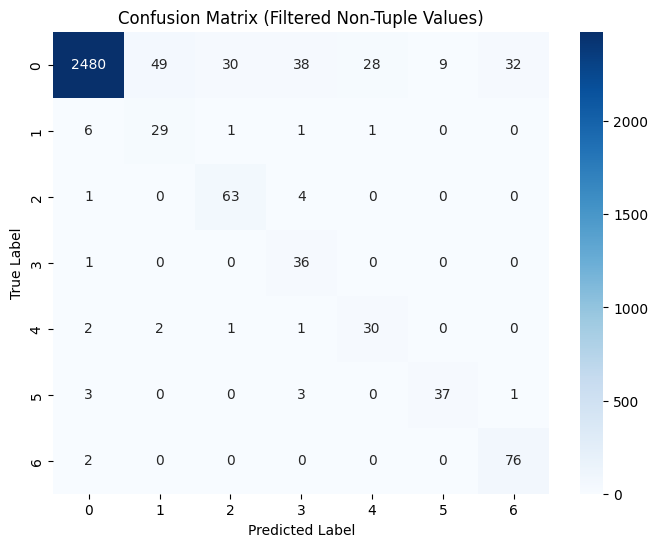

In [34]:
# make confusion matrix for test (ignore tuples)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out indices where either y_true or y_pred is a tuple
filtered_y_true = []
filtered_y_pred = []

for true, pred in zip(y_true, y_pred):
    if not isinstance(true, tuple) and not isinstance(pred, tuple):
        filtered_y_true.append(true)
        filtered_y_pred.append(pred)

# Generate confusion matrix
cm = confusion_matrix(filtered_y_true, filtered_y_pred)
print("Filtered Confusion Matrix:\n", cm)

# Optional: class labels (modify if needed)
class_labels = list(sorted(set(filtered_y_true + filtered_y_pred)))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Filtered Non-Tuple Values)')
plt.show()

## Evaluate Testing Set Performance 

In [35]:
# Select points to explain from testing set

# load testing dataset 
path_to_hdf5_test = "/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE/ecg_tracings.hdf5"
dataset_name_test = "tracings"  

# Import data. SEQ is an instance of class ECGSequence
seq = datasets.ECGSequence(path_to_hdf5_test, dataset_name_test)  # using default batch size

# load pretrained model (still need to compile later) 
model_path = "/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/PretrainedModels/model/model.hdf5"
pre_model = load_model(model_path)  

# compile and apply model to testing dataset
pre_model.compile(loss='binary_crossentropy', optimizer=Adam())
model_predictions = pre_model.predict(seq,verbose=1)   # y_score is a numpy array with dimensions 827x6. It holds the predictions generated by the model

# extra
print(model_predictions.shape)
print(model_predictions[:5])

# Generate dataframe
np.save("/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/dnn_output.npy", model_predictions)
print("Output predictions saved")

/project/peaclab-mon/JustinECG_P10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 38s 364ms/step
(827, 6)
[[1.4243196e-06 1.0710056e-07 2.6337020e-07 4.5377445e-07 9.4853772e-07
  6.4135262e-09]
 [2.8897338e-02 2.0066665e-03 3.1778637e-01 2.8277413e-05 4.8343457e-02
  3.2049985e-04]
 [3.1124635e-04 2.9402861e-05 4.1752328e-06 1.9712777e-05 9.3489867e-03
  2.4932469e-05]
 [2.3969067e-09 1.7344908e-09 6.9393541e-10 8.1738605e-10 5.6821343e-09
  2.7672636e-10]
 [5.3062313e-04 3.5334467e-06 3.3941697e-07 1.4301397e-06 2.2422858e-04
  4.7077424e-06]]
Output predictions saved


In [36]:
# load predictions to make y_pred
model_predictions = np.load("/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/dnn_output.npy")
# make y_pred
y_pred_test = ECG_one_d_labels(model_predictions, onehot_labels = False)

# make y_true
y_true_2D_test = pd.read_csv('/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE/annotations/gold_standard.csv').values
# convert 2D to 1D
y_true_test = ECG_one_d_labels(y_true_2D_test, onehot_labels = True)

(827, 6)


In [37]:
output_evaluation(y_pred_test, y_true_test)

Labels: [np.int64(0) np.int64(1) np.int64(2) np.int64(3) np.int64(4) np.int64(5)
 np.int64(6)]

Class 0 Confusion Matrix:
[[138   8]
 [ 11 670]]

Class 1 Confusion Matrix:
[[799   0]
 [ 10  18]]

Class 2 Confusion Matrix:
[[788   5]
 [  1  33]]

Class 3 Confusion Matrix:
[[796   1]
 [  0  30]]

Class 4 Confusion Matrix:
[[807   4]
 [  2  14]]

Class 5 Confusion Matrix:
[[814   0]
 [  6   7]]

Class 6 Confusion Matrix:
[[787   3]
 [  3  34]]

Classification Report:
              precision    recall  f1-score   support

     class 0       0.99      0.98      0.99       681
     class 1       1.00      0.64      0.78        28
     class 2       0.87      0.97      0.92        34
     class 3       0.97      1.00      0.98        30
     class 4       0.78      0.88      0.82        16
     class 5       1.00      0.54      0.70        13
     class 6       0.92      0.92      0.92        37

   micro avg       0.97      0.96      0.97       839
   macro avg       0.93      0.85      0.87

Filtered Confusion Matrix:
 [[670   0   4   0   4   0   3]
 [  3  17   0   0   0   0   0]
 [  0   0  27   1   0   0   0]
 [  0   0   0  25   0   0   0]
 [  1   0   0   0  14   0   0]
 [  4   0   0   0   0   7   0]
 [  0   0   1   0   0   0  34]]


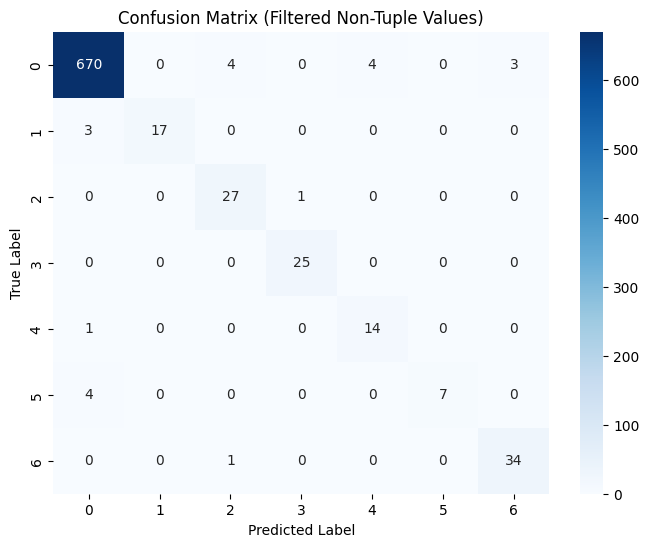

In [38]:
# make confusion matrix for test (ignore tuples)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out indices where either y_true or y_pred is a tuple
filtered_y_true = []
filtered_y_pred = []

for true, pred in zip(y_true_test, y_pred_test):
    if not isinstance(true, tuple) and not isinstance(pred, tuple):
        filtered_y_true.append(true)
        filtered_y_pred.append(pred)

# Generate confusion matrix
cm = confusion_matrix(filtered_y_true, filtered_y_pred)
print("Filtered Confusion Matrix:\n", cm)

# Optional: class labels (modify if needed)
class_labels = list(sorted(set(filtered_y_true + filtered_y_pred)))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Filtered Non-Tuple Values)')
plt.show()